In [1]:
import numpy as np
import matplotlib.pyplot as plt
from salishsea_tools import viz_tools, places, visualisations
import netCDF4 as nc # unless you prefer xarray
import datetime as dt
import os
import glob
import cmocean

from IPython.display import Markdown, display
%matplotlib inline

### Load a file from the 201905 hindcast

In [2]:
f0=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_ptrc_T.nc')

In [3]:
f1=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201005_201005_ptrc_T.nc')

In [4]:
f2=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201105_201105_ptrc_T.nc')

In [5]:
f3=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201205_201205_ptrc_T.nc')

In [6]:
f4=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201305_201305_ptrc_T.nc')

In [7]:
f5=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201405_201405_ptrc_T.nc')

In [8]:
f6=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201505_201505_ptrc_T.nc')

In [9]:
f7=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201605_201605_ptrc_T.nc')

In [10]:
f8=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201705_201705_ptrc_T.nc')

In [11]:
f9=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201805_201805_ptrc_T.nc')

In [12]:
f10=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201905_201905_ptrc_T.nc')

In [13]:
print(f0.variables.keys())

dict_keys(['nav_lat', 'nav_lon', 'bounds_lon', 'bounds_lat', 'area', 'deptht', 'deptht_bounds', 'nitrate', 'time_centered', 'time_centered_bounds', 'time_counter', 'time_counter_bounds', 'ammonium', 'silicon', 'diatoms', 'flagellates', 'ciliates', 'microzooplankton', 'dissolved_organic_nitrogen', 'particulate_organic_nitrogen', 'biogenic_silicon', 'mesozooplankton'])


In [14]:
fe3t0=nc.Dataset('/data/sallen/results/MEOPAR/averages/SalishSea_may_climate_2007_2019_carp_T.nc')

In [15]:
fe3t1=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201005_201005_carp_T.nc')

In [16]:
fe3t2=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201105_201105_carp_T.nc')

In [17]:
fe3t3=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201205_201205_carp_T.nc')

In [18]:
fe3t4=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201305_201305_carp_T.nc')

In [19]:
fe3t5=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201405_201405_carp_T.nc')

In [20]:
fe3t6=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201505_201505_carp_T.nc')

In [21]:
fe3t7=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201605_201605_carp_T.nc')

In [22]:
fe3t8=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201705_201705_carp_T.nc')

In [23]:
fe3t9=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201805_201805_carp_T.nc')

In [24]:
fe3t10=nc.Dataset('/results/SalishSea/month-avg.201905/SalishSea_1m_201905_201905_carp_T.nc')

In [25]:
# return times as datetime objects:
torig=dt.datetime.strptime(f0.variables['time_centered'].time_origin,'%Y-%m-%d %H:%M:%S')
print(torig)
times=np.array([torig + dt.timedelta(seconds=ii) for ii in f0.variables['time_centered'][:]])

1900-01-01 00:00:00


In [26]:
# load model mesh
with nc.Dataset('/data/eolson/results/MEOPAR/NEMO-forcing-new/grid/mesh_mask201702.nc') as fm:
    print(fm.variables.keys())
    tmask=fm.variables['tmask'][:,:,:,:]
    navlon=fm.variables['nav_lon'][:,:]
    navlat=fm.variables['nav_lat'][:,:]

dict_keys(['nav_lon', 'nav_lat', 'time_counter', 'tmask', 'umask', 'vmask', 'fmask', 'tmaskutil', 'umaskutil', 'vmaskutil', 'fmaskutil', 'glamt', 'glamu', 'glamv', 'glamf', 'gphit', 'gphiu', 'gphiv', 'gphif', 'e1t', 'e1u', 'e1v', 'e1f', 'e2t', 'e2u', 'e2v', 'e2f', 'ff', 'mbathy', 'misf', 'isfdraft', 'e3t_0', 'e3u_0', 'e3v_0', 'e3w_0', 'gdept_0', 'gdepu', 'gdepv', 'gdepw_0', 'gdept_1d', 'gdepw_1d', 'e3t_1d', 'e3w_1d'])


In [27]:
il=0
diat0=np.sum(f0.variables['diatoms'][il,:,:,:]*fe3t0.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat1=np.sum(f1.variables['diatoms'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat2=np.sum(f2.variables['diatoms'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat3=np.sum(f3.variables['diatoms'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat4=np.sum(f4.variables['diatoms'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat5=np.sum(f5.variables['diatoms'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat6=np.sum(f6.variables['diatoms'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat7=np.sum(f7.variables['diatoms'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat8=np.sum(f8.variables['diatoms'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat9=np.sum(f9.variables['diatoms'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
diat10=np.sum(f10.variables['diatoms'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)


/home/ksuchy/anaconda3/envs/py39/lib/python3.9/site-packages/numpy/ma/core.py:1021: RuntimeWarning: overflow encountered in multiply
  result = self.f(da, db, *args, **kwargs)


In [28]:
il=0
dino0=np.sum(f0.variables['flagellates'][il,:,:,:]*fe3t0.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino1=np.sum(f1.variables['flagellates'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino2=np.sum(f2.variables['flagellates'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino3=np.sum(f3.variables['flagellates'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino4=np.sum(f4.variables['flagellates'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino5=np.sum(f5.variables['flagellates'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino6=np.sum(f6.variables['flagellates'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino7=np.sum(f7.variables['flagellates'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino8=np.sum(f8.variables['flagellates'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino9=np.sum(f9.variables['flagellates'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
dino10=np.sum(f10.variables['flagellates'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)



In [29]:
il=0
cili0=np.sum(f0.variables['ciliates'][il,:,:,:]*fe3t0.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili1=np.sum(f1.variables['ciliates'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili2=np.sum(f2.variables['ciliates'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili3=np.sum(f3.variables['ciliates'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili4=np.sum(f4.variables['ciliates'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili5=np.sum(f5.variables['ciliates'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili6=np.sum(f6.variables['ciliates'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili7=np.sum(f7.variables['ciliates'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili8=np.sum(f8.variables['ciliates'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili9=np.sum(f9.variables['ciliates'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
cili10=np.sum(f10.variables['ciliates'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

In [30]:
il=0
micz0=np.sum(f0.variables['microzooplankton'][il,:,:,:]*fe3t0.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz1=np.sum(f1.variables['microzooplankton'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz2=np.sum(f2.variables['microzooplankton'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz3=np.sum(f3.variables['microzooplankton'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz4=np.sum(f4.variables['microzooplankton'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz5=np.sum(f5.variables['microzooplankton'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz6=np.sum(f6.variables['microzooplankton'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz7=np.sum(f7.variables['microzooplankton'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz8=np.sum(f8.variables['microzooplankton'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz9=np.sum(f9.variables['microzooplankton'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
micz10=np.sum(f10.variables['microzooplankton'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

In [31]:
il=0
pon0=np.sum(f0.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t0.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon1=np.sum(f1.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t1.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon2=np.sum(f2.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t2.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon3=np.sum(f3.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t3.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon4=np.sum(f4.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t4.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon5=np.sum(f5.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t5.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon6=np.sum(f6.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t6.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon7=np.sum(f7.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t7.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon8=np.sum(f8.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t8.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon9=np.sum(f9.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t9.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)
pon10=np.sum(f10.variables['particulate_organic_nitrogen'][il,:,:,:]*fe3t10.variables['e3t'][il,:,:,:]*tmask[0,:,:,:],0)

In [32]:
intuz0=diat0+dino0+cili0+micz0+pon0
intuz1=diat1+dino1+cili1+micz1+pon1
intuz2=diat2+dino2+cili2+micz2+pon2
intuz3=diat3+dino3+cili3+micz3+pon3
intuz4=diat4+dino4+cili4+micz4+pon4
intuz5=diat5+dino5+cili5+micz5+pon5
intuz6=diat6+dino6+cili6+micz6+pon6
intuz7=diat7+dino7+cili7+micz7+pon7
intuz8=diat8+dino8+cili8+micz8+pon8
intuz9=diat9+dino9+cili9+micz9+pon9
intuz10=diat10+dino10+cili10+micz10+pon10

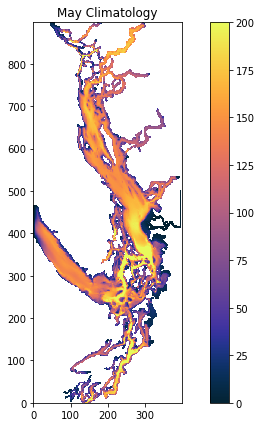

In [33]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0

fig,ax=plt.subplots(1,1,figsize=(10,7))
#fig.suptitle('Annual Anomalies Mesozoop Feeding on Diatoms', fontsize=16)
m0=ax.pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,(intuz0)),cmap='cmo.thermal',vmin=0,vmax=200)
viz_tools.set_aspect(ax,coords='grid')
ax.set_title('May Climatology')
fig.colorbar(m0,ax=ax)




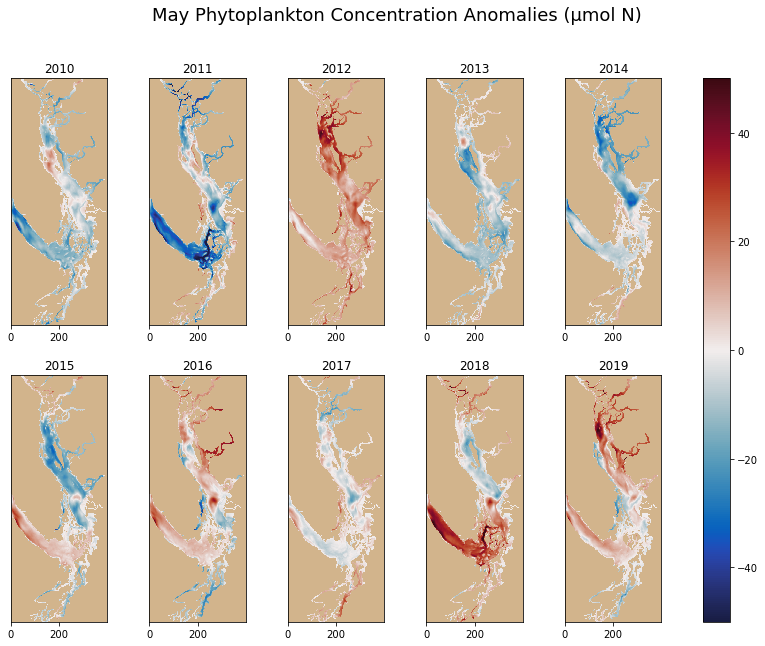

In [34]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-50
vmax=50

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May Phytoplankton Concentration Anomalies (\u03bcmol N)', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz1-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz2-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz3-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz4-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz5-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz6-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz7-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz8-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz9-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((intuz10-intuz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

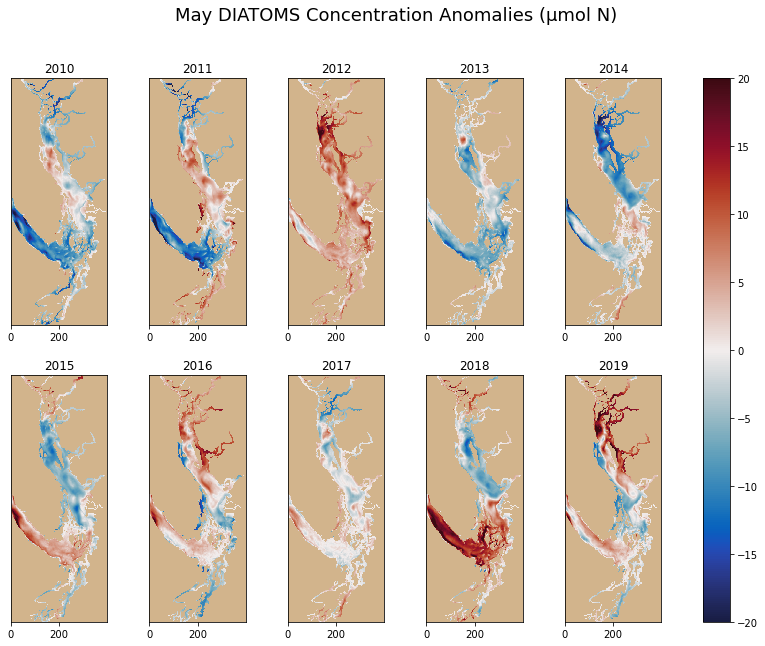

In [42]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-20
vmax=20

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May DIATOMS Concentration Anomalies (\u03bcmol N)', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat1-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat2-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat3-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat4-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat5-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat6-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat7-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat8-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat9-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((diat10-diat0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

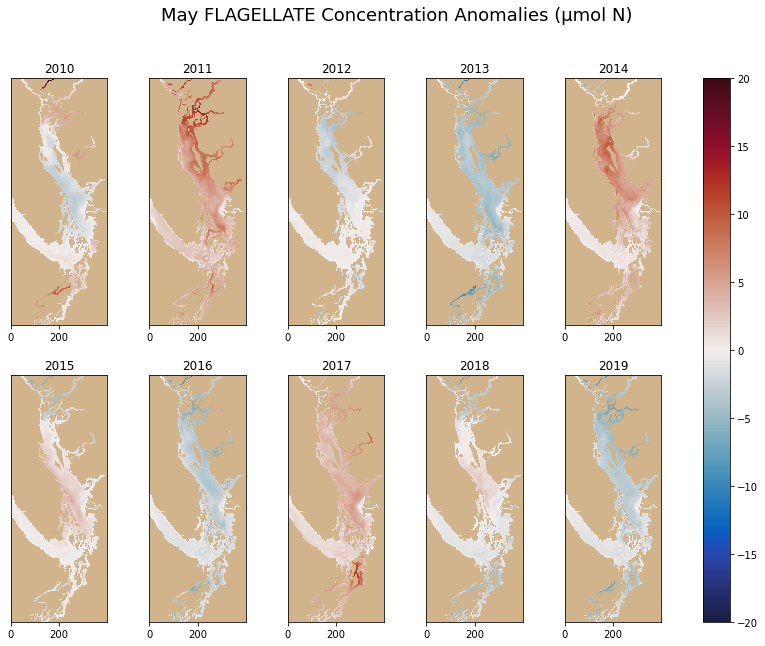

In [39]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-20
vmax=20

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May FLAGELLATE Concentration Anomalies (\u03bcmol N)', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino1-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino2-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino3-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino4-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino5-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino6-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino7-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino8-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino9-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((dino10-dino0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

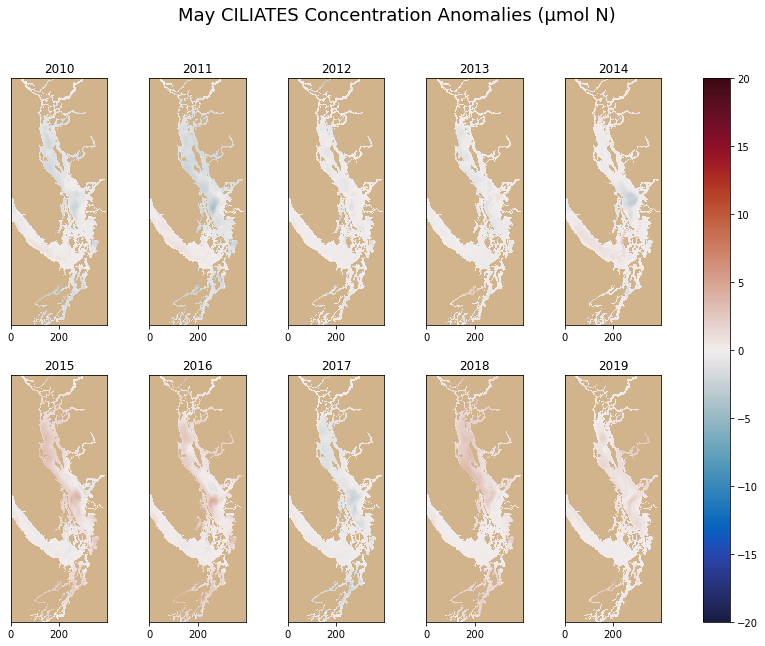

In [48]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-20
vmax=20

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May CILIATES Concentration Anomalies (\u03bcmol N)', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili1-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili2-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili3-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili4-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili5-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili6-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili7-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili8-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili9-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((cili10-cili0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

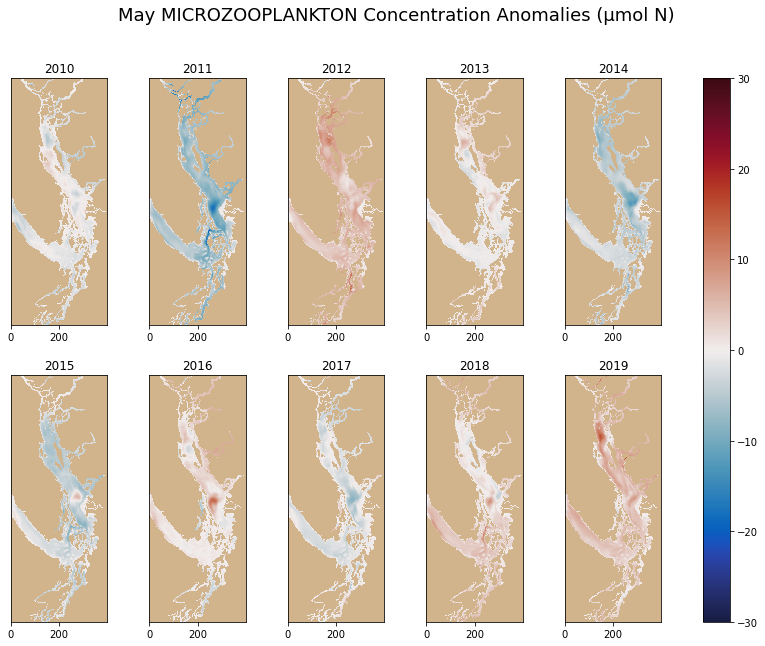

In [46]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-20
vmax=20

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May MICROZOOPLANKTON Concentration Anomalies (\u03bcmol N)', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz1-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz2-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz3-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz4-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz5-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz6-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz7-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz8-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz9-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((micz10-micz0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

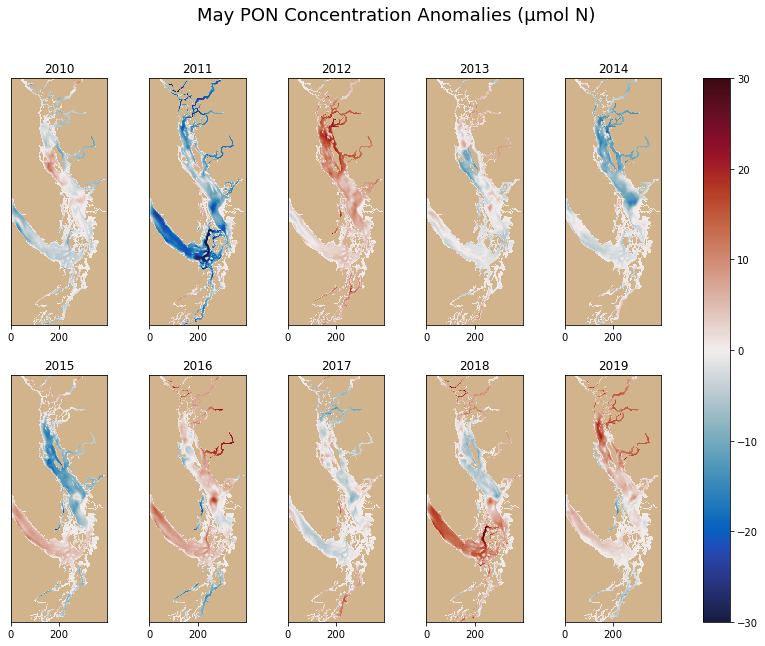

In [45]:
##### with pcolormesh: no smoothing
cmap0=cmocean.cm.balance
cmap0.set_bad('tan')

#cmap1=cmocean.cm.haline
#cmap1.set_bad('k')
il=0
vmin=-20
vmax=20

fig,ax=plt.subplots(2,5,figsize=(15,10))
fig.suptitle('May PON Concentration Anomalies (\u03bcmol N)', fontsize=18)


m0=ax[0,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon1-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,0],coords='grid')
ax[0,0].set_title('2010')
ax[0,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[0,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon2-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,1],coords='grid')
ax[0,1].set_title('2011')
ax[0,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[0,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon3-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,2],coords='grid')
ax[0,2].set_title('2012')
ax[0,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[0,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon4-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,3],coords='grid')
ax[0,3].set_title('2013')
ax[0,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[0,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon5-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[0,4],coords='grid')
ax[0,4].set_title('2014')
ax[0,4].yaxis.set_visible(False)


##row 2
m0=ax[1,0].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon6-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,0],coords='grid')
ax[1,0].set_title('2015')
ax[1,0].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[1])

m0=ax[1,1].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon7-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,1],coords='grid')
ax[1,1].set_title('2016')
ax[1,1].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[2])

m0=ax[1,2].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon8-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,2],coords='grid')
ax[1,2].set_title('2017')
ax[1,2].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[3])

m0=ax[1,3].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon9-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,3],coords='grid')
ax[1,3].set_title('2018')
ax[1,3].yaxis.set_visible(False)
#fig.colorbar(m0,ax=ax[4])

m0=ax[1,4].pcolormesh(np.ma.masked_where(tmask[0,0,:,:]==0,((pon10-pon0))),cmap=cmap0,vmin=vmin,vmax=vmax)
viz_tools.set_aspect(ax[1,4],coords='grid')
ax[1,4].set_title('2019')
ax[1,4].yaxis.set_visible(False)


fig.colorbar(m0,ax=ax)

In [33]:
f0.close()
fe3t0.close()

In [34]:
f1.close()
fe3t1.close()

In [35]:
f2.close()
fe3t2.close()

In [36]:
f3.close()
fe3t3.close()

In [37]:
f4.close()
fe3t4.close()

In [38]:
f5.close()
fe3t5.close()

In [39]:
f6.close()
fe3t6.close()

In [40]:
f7.close()
fe3t7.close()

In [41]:
f8.close()
fe3t8.close()

In [42]:
f9.close()
fe3t9.close()

In [43]:
f10.close()
fe3t10.close()